In [8]:
import getEPH
import categorize
import schoolYears
import make_dummy
import functionsForModels
import pandas as pd
#http://statsmodels.sourceforge.net/devel/examples/generated/example_wls.html
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)
%matplotlib inline

/home/pipe/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NOTAS

* CALCULAR EN BASE AL MODELO DE CURVAS LAS DERIVADAS Y DONDE HACE EL PICO EN EDAD
* 


# DOWNLOAD DATA

In [2]:
#get data
getEPHdbf('t310')

('Downloading', 't310')
file in place, creating CSV file
csv file cleanData t310 .csv successfully created in folder data/


In [3]:
data1 = pd.read_csv('data/cleanDatat310.csv')

In [6]:
data2 = categorize.categorize(data1)
data3 = schoolYears.schoolYears(data2)
data = make_dummy.make_dummy(data3)

In [9]:
dataModel = functionsForModels.prepareDataForModel(data)

In [10]:
dataModel.head()

,PONDERA,P47T,P21,primary,secondary,university,male_14to24,male_25to34,female_14to24,female_25to34,female_35more,female,age,education,education2,age2,lnIncome,lnIncomeT
2,1674,3000,3000,7.0,0.0,0.0,0,0,0,0,0,0,42,7.0,49.0,1764,8.006368,8.006368
3,1674,2800,2800,7.0,5.0,5.0,0,0,0,0,1,1,44,17.0,289.0,1936,7.937375,7.937375
7,1320,6000,5000,7.0,5.0,5.0,0,0,0,0,0,0,38,17.0,289.0,1444,8.517193,8.699515
8,1320,4000,4000,7.0,5.0,5.0,0,0,0,1,0,1,28,17.0,289.0,784,8.294050,8.294050
9,1281,3800,3800,7.0,5.0,5.0,0,0,0,0,0,0,63,17.0,289.0,3969,8.242756,8.242756


# NEW VARIABLES FOR MODEL

# Graficos exploratorios

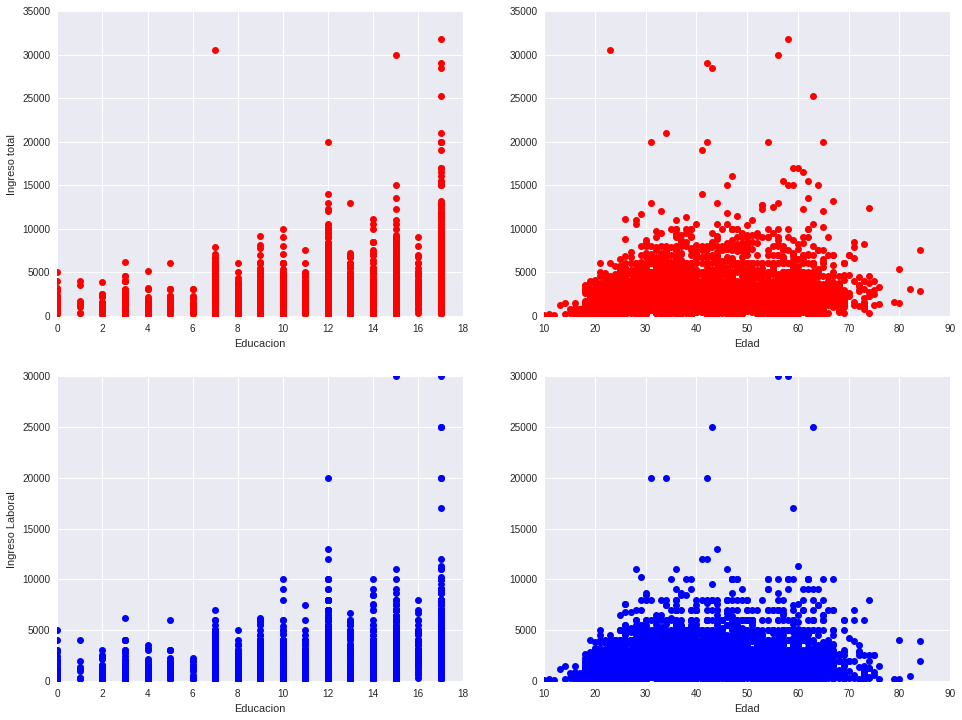

In [11]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(dataModel.education,dataModel.P47T,'ro')
ax1.set_ylabel('Ingreso total')
ax1.set_xlabel('Educacion')
ax2.plot(dataModel.age,dataModel.P47T,'ro')
ax2.set_xlabel('Edad')
ax3.plot(dataModel.education,dataModel.P21,'bo')
ax3.set_ylabel('Ingreso Laboral')
ax3.set_xlabel('Educacion')
ax4.plot(dataModel.age,dataModel.P21,'bo')
ax4.set_xlabel('Edad')

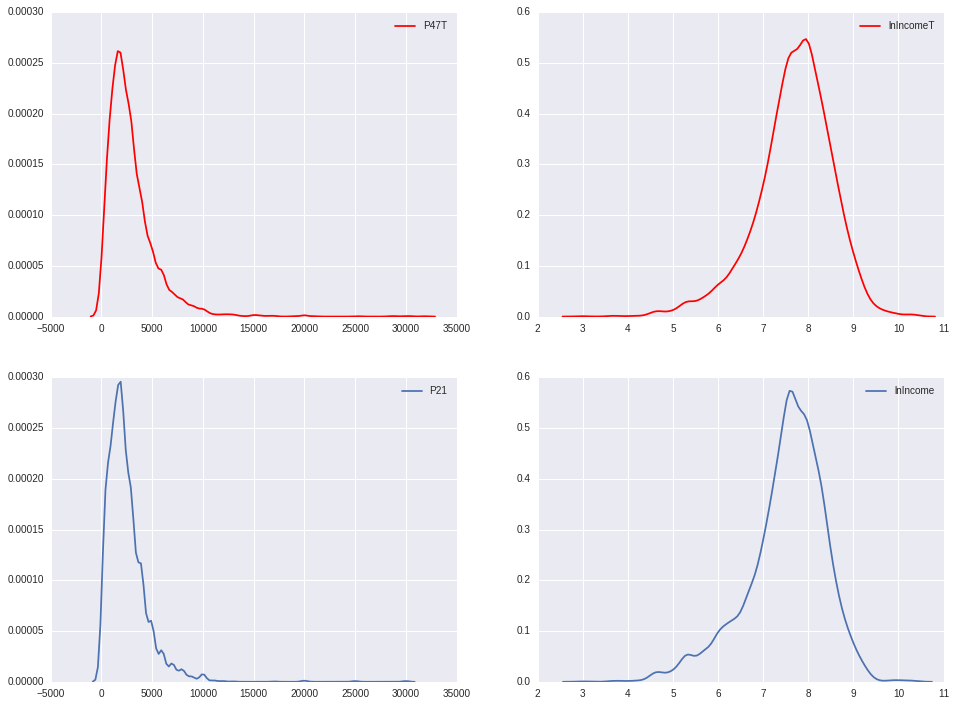

In [12]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


sns.kdeplot(dataModel.P47T,ax=ax1,color = 'red')
sns.kdeplot(dataModel.lnIncomeT,ax=ax2,color = 'red')
sns.kdeplot(dataModel.P21,ax=ax3)
sns.kdeplot(dataModel.lnIncome,ax=ax4)

In [ ]:
print 'mean:', dataModel.lnIncome.mean(), 'std:', dataModel.lnIncome.std()

In [ ]:
print 'mean:', dataModel.P21.mean(), 'std:', dataModel.P21.std()

In [ ]:
plt.boxplot(list(dataModel.P21), 0, 'gD')

# PLOTS FOR LnINCOME ~ EDUC AND AGE

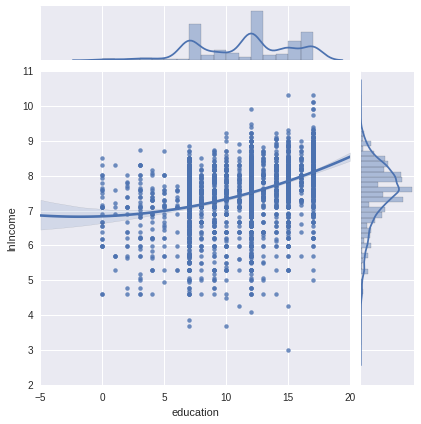

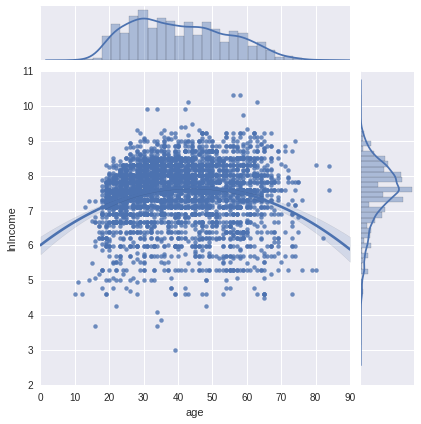

In [13]:
g = sns.JointGrid(x="education", y="lnIncome", data=dataModel)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)

g2 = sns.JointGrid(x="age", y="lnIncome", data=dataModel)  
g2.plot_joint(sns.regplot, order=2)  
g2.plot_marginals(sns.distplot)

# Modelos

Tomo el de mejor performance para evaluar en el test set. Basicamente son dos posibiliades INDEC o ALTERNATIVO (que habiamos propuesto no cortar las edades y los años de escolaridad, sino usar las variables y directamente usar el cuadrado). Cada uno lo pruebo con ingresos laborales (con y sin constante) y con el log del ingreso laboral.

## 1 CEPAL con ingresos laborales

In [14]:
dataModel1 = runModel(dataModel, income = 'P21')

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            WLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     154.1
Date:                Fri, 18 Nov 2016   Prob (F-statistic):          2.16e-223
Time:                        14:58:03   Log-Likelihood:                -31770.
No. Observations:                3568   AIC:                         6.356e+04
Df Residuals:                    3559   BIC:                         6.361e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1651.4434    222.230      7.431      0.0

## 2 - CEPAL con Log ingresos laborales 

In [15]:
dataModel2 = functionsForModels.runModel(dataModel, income = 'lnIncome', variables= [
        'primary','secondary','university',
        'male_14to24','male_25to34',
        'female_14to24', 'female_25to34', 'female_35more'])

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            WLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     169.6
Date:                Thu, 24 Nov 2016   Prob (F-statistic):          1.71e-243
Time:                        12:04:03   Log-Likelihood:                -4124.3
No. Observations:                3608   AIC:                             8267.
Df Residuals:                    3599   BIC:                             8322.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8690      0.093     73.616      0.0

## 3 - CEPAL con ingresos totales

In [ ]:
dataModel3 = runModel(dataModel, income = 'P47T')

## 4 - CEPAL con Log ingresos totales

In [ ]:
dataModel4 = runModel(dataModel, income = 'lnIncomeT')

## 5 - ALTERNATIVO con Log ingresos totales

In [ ]:
dataModel5 = runModel(dataModel, income = 'lnIncomeT', variables=['education','education2',
                                'age','age2','female'])

## 6 - ALTERNATIVO con log Income laboral 

In [ ]:
dataModel6 = runModel(dataModel, income = 'lnIncome', variables=['education','education2',
                                'age','age2','female'])